In [110]:
import numpy as np
import pandas as pd
from datetime import date
from matplotlib import pyplot as plt
from matplotlib import colors
import seaborn as sns

In [87]:
customer = pd.read_csv('marketing_campaign.csv', sep='\t')
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [88]:
customer.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [89]:
len(customer)

2240

In [90]:
customer.isnull()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2236,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2237,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2238,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [91]:
customer.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [92]:
# find and show columns with null values
customer[customer.isna().any(axis=1)]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,...,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5,...,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,05-11-2013,80,81,...,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,01-01-2014,96,48,...,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,17-06-2013,57,11,...,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,NaN,1,0,14-09-2012,25,25,...,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,19-11-2012,4,230,...,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,27-05-2014,45,7,...,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,23-11-2013,87,445,...,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,11-07-2013,23,352,...,6,0,0,0,0,0,0,3,11,0


In [93]:
# dropping null values
customer=customer.dropna()

In [94]:
customer.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [95]:
print("Lenght of dataset after null values are removed = ", len(customer))
# Notice intially length was 2240

Lenght of dataset after null values are removed =  2216


In [96]:
# checking the newest and oldest record in the dataset
#converting the object type to date time
customer["Dt_Customer"] = pd.to_datetime(customer["Dt_Customer"])
dates = customer["Dt_Customer"].dt.date
print(dates)
print(f"Newest customer={max(dates)}")
print(f"Oldest customer={min(dates)}")

0       2012-04-09
1       2014-08-03
2       2013-08-21
3       2014-10-02
4       2014-01-19
           ...    
2235    2013-06-13
2236    2014-10-06
2237    2014-01-25
2238    2014-01-24
2239    2012-10-15
Name: Dt_Customer, Length: 2216, dtype: object
Newest customer=2014-12-06
Oldest customer=2012-01-08


In [97]:
#calculating other customer's number of days relative to the oldest customer in the dataset
relative_date = min(dates) #oldest customer
customer_days = [date-relative_date for date in dates]
customer["Customer_For_Days"] = customer_days
customer["Customer_For_Days"] = customer.Customer_For_Days.astype(str).map(lambda x: x[:-4])
customer["Customer_For_Days"] = pd.to_numeric(customer["Customer_For_Days"], errors="coerce")
customer["Customer_For_Days"]

0         92
1        938
2        591
3        998
4        742
        ... 
2235     522
2236    1002
2237     748
2238     747
2239     281
Name: Customer_For_Days, Length: 2216, dtype: int64

In [98]:
#Explore the marital category count
print("Categories and count in Marital Status")
customer["Marital_Status"].value_counts()

Categories and count in Marital Status


Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [99]:
#Explore the education category count
print("Categories and count in education Status")
customer["Education"].value_counts()

Categories and count in education Status


Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64

In [100]:
### Feature Engineering 

In [101]:
# Get Age of customers per current year
curr_year = date.today().year
print(f"Current Year = {curr_year}")
customer["Age"] = curr_year - customer["Year_Birth"]
# Get The total amount spent
customer["Spent_Amount"] = customer["MntWines"]+ customer["MntFruits"]+ customer["MntMeatProducts"]+ customer["MntFishProducts"]+ customer["MntSweetProducts"]+ customer["MntGoldProds"]

# Reducing the married/single status to partner/single status
# Married     857
# Together    573
# Single      471
# Divorced    232
# Widow        76
# Alone         3
# Absurd        2
# YOLO          2
# reducing all the single statuses (absurd, widow, divorced, alone, YOLO -> single)
customer["Partner"]=customer["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Single", "Widow":"Single", "YOLO":"Single", "Divorced":"Single", "Alone":"Single"})

# Number of total children
customer["Children"]=customer["Kidhome"]+customer["Teenhome"]

# Total household size
customer["Household_Size"] = customer["Partner"].replace({"Single": 1, "Partner":2})+ customer["Children"]

# is parent or not
customer["Is_Parent"] = np.where(customer.Children> 0, 1, 0)

Current Year = 2021


In [102]:
#Rename some columns
# MntWines -> Wines
# MntFruits -> Fruits
# MntMeatProducts -> Meat
# MntFishProducts -> Fish
# MntSweetProducts -> Sweets
# MntGoldProds -> Gold
customer=customer.rename(columns={"MntWines": "Wines_Amnt_Spent","MntFruits":"Fruits_Amnt_Spent","MntMeatProducts":"Meat_Amnt_Spent","MntFishProducts":"Fish_Amnt_Spent","MntSweetProducts":"Sweets_Amnt_Spent","MntGoldProds":"Gold_Amnt_Spent"})
customer.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines_Amnt_Spent,...,Z_CostContact,Z_Revenue,Response,Customer_For_Days,Age,Spent_Amount,Partner,Children,Household_Size,Is_Parent
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,3,11,1,92,64,1617,Single,0,1,0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,3,11,0,938,67,27,Single,2,3,1
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,3,11,0,591,56,776,Partner,0,2,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,3,11,0,998,37,53,Partner,1,3,1
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,3,11,0,742,40,422,Partner,1,3,1


In [103]:
# Grouping Education Level
# current levels 
# customer["Education"].value_counts()
# Categories and count in education Status
# Graduation    1116
# PhD            481
# Master         365
# 2n Cycle       200
# Basic           54
# Reducing -----
# Basic - Undergraduate
# 2nd Cycle - Undergraduate
# Graduation - Graduate
# Master - Postgraduate
# PhD - Postgraduate
customer["Education"]=customer["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

In [104]:
# Dropping some redundant and unused features
# Marital status - since we already feature engineered it to "Partner"
drop_cols = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
customer = customer.drop(drop_cols, axis=1)

In [105]:
customer.describe()

,Income,Kidhome,Teenhome,Recency,Wines_Amnt_Spent,Fruits_Amnt_Spent,Meat_Amnt_Spent,Fish_Amnt_Spent,Sweets_Amnt_Spent,Gold_Amnt_Spent,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_For_Days,Age,Spent_Amount,Children,Household_Size,Is_Parent
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,...,0.064079,0.013538,0.009477,0.150271,550.993682,52.179603,607.075361,0.947202,2.592509,0.714350
std,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,...,0.244950,0.115588,0.096907,0.357417,232.469034,11.985554,602.900476,0.749062,0.905722,0.451825
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,5.000000,0.000000,1.000000,0.000000
25%,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,377.000000,44.000000,69.000000,0.000000,2.000000,0.000000
50%,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,...,0.000000,0.000000,0.000000,0.000000,550.000000,51.000000,396.500000,1.000000,3.000000,1.000000
75%,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,...,0.000000,0.000000,0.000000,0.000000,723.000000,62.000000,1048.000000,1.000000,3.000000,1.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1063.000000,128.000000,2525.000000,3.000000,5.000000,1.000000


Relative Plot of selected features


<Figure size 432x288 with 0 Axes>

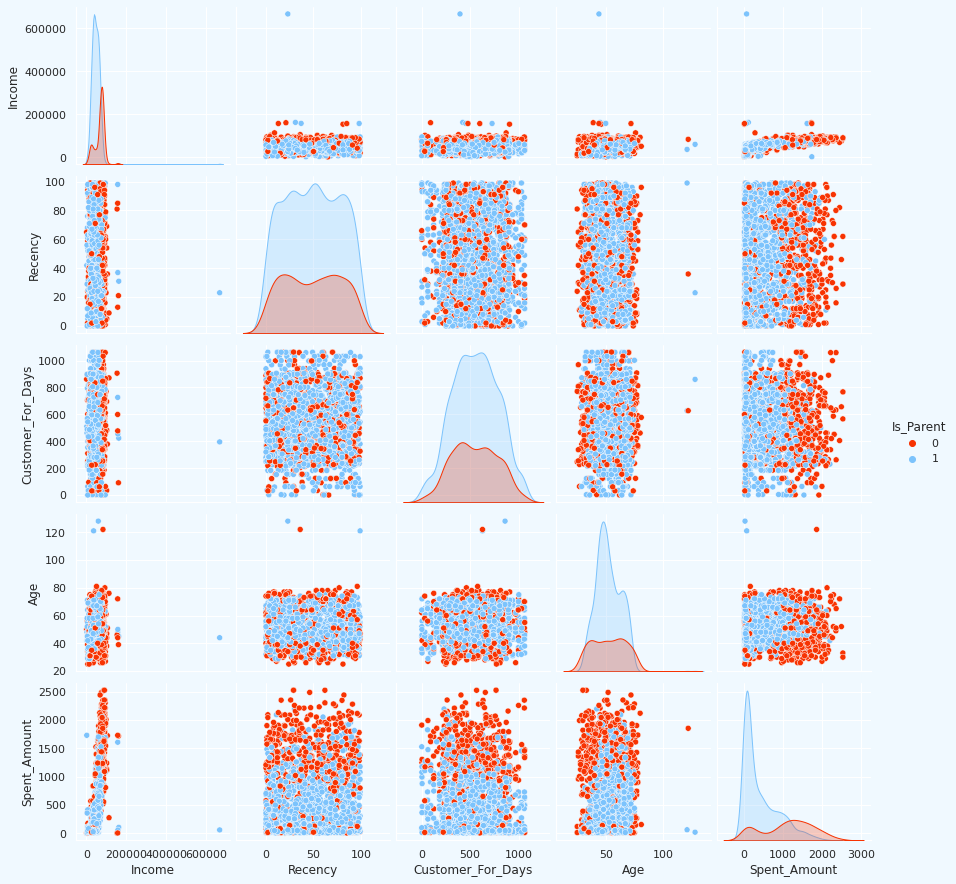

In [129]:
# observing the data
# max age = 128, to identify outliers?
# setting the colors
sns.set(rc={"axes.facecolor":"#f0f9ff","figure.facecolor":"#f0f9ff"})
pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])
#Plotting following features
To_Plot = [ "Income", "Recency", "Customer_For_Days", "Age", "Spent_Amount", "Is_Parent"]
print("Relative Plot of selected features")
plt.figure()
sns.pairplot(customer[To_Plot], hue= "Is_Parent",palette= (["#f73302","#7cc3fc"]))
#Taking hue 
plt.show()

In [ ]:
# income and age has certain outliers if referred from above
